Test Loss: 1.97730005311314e-05
Test Accuracy: 1.0
13/13 [==============================] - 0s 3ms/step
Confusion Matrix:
[[199   0]
 [  0 201]]


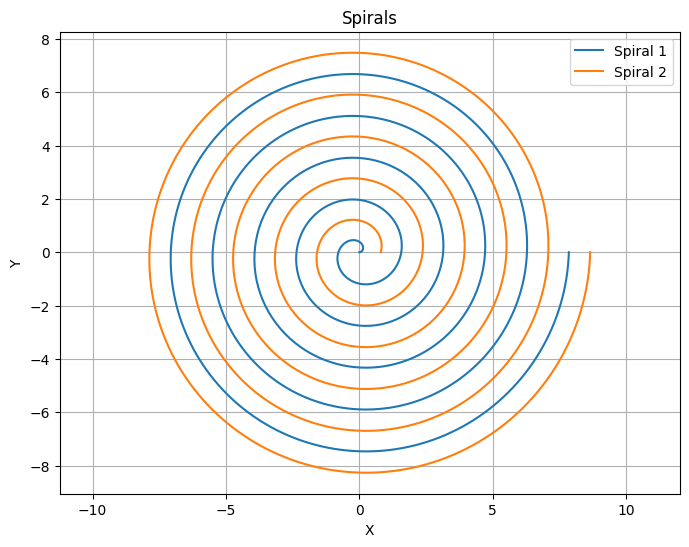

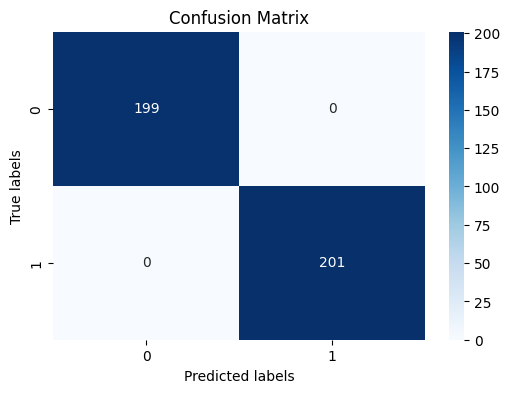

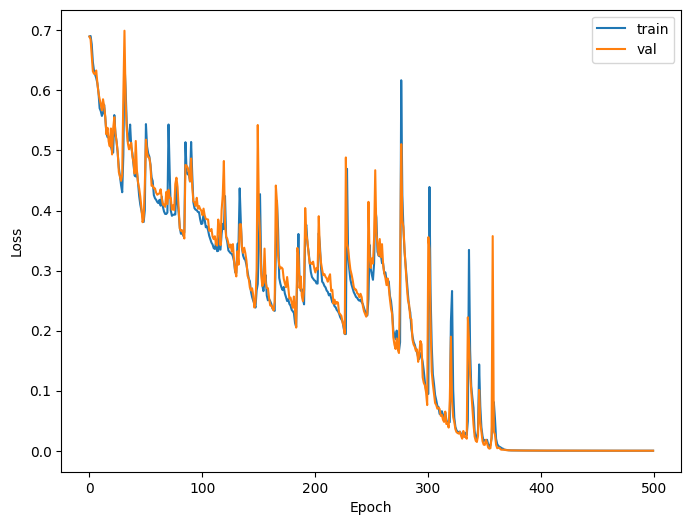

1035/1035 [==============================] - 4s 3ms/step


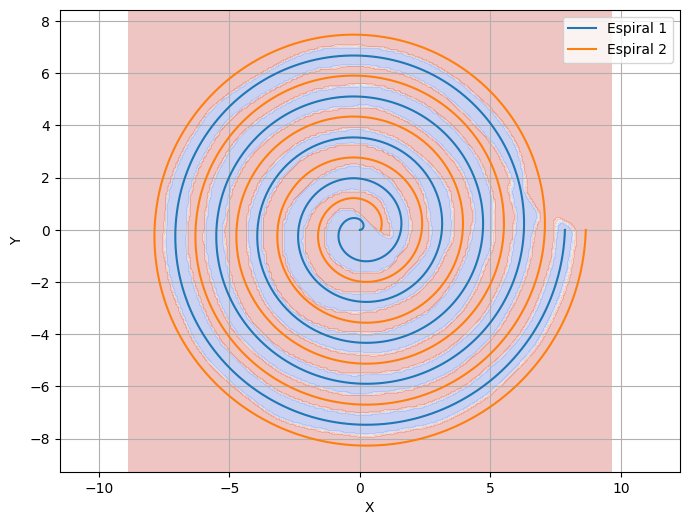

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir as equações das espirais
def spiral_1(theta):
    x = (theta / 4) * np.cos(theta)
    y = (theta / 4) * np.sin(theta)
    return x, y

def spiral_2(theta):
    x = ((theta / 4) + 0.8) * np.cos(theta)
    y = ((theta / 4) + 0.8) * np.sin(theta)
    return x, y

# Gerar pontos das espirais
theta_1 = np.linspace(0, 10*np.pi, 1000)
x1, y1 = spiral_1(theta_1)

theta_2 = np.linspace(0, 10*np.pi, 1000)
x2, y2 = spiral_2(theta_2)

# Plotar as espirais
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Spiral 1')
plt.plot(x2, y2, label='Spiral 2')
plt.title('Spirals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Gerar dados para espiral 1
spiral_1_data = np.column_stack((x1, y1))
labels_1 = np.zeros(len(theta_1))

# Gerar dados para espiral 2
spiral_2_data = np.column_stack((x2, y2))
labels_2 = np.ones(len(theta_2))

# Combinar dados e rótulos
X = np.concatenate((spiral_1_data, spiral_2_data), axis=0)
y = np.concatenate((labels_1, labels_2))

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir o modelo da rede neural
model = Sequential([
    Dense(500, activation='relu', input_shape=(2,)),
    Dense(400, activation='relu'),
    Dense(300, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  # Camada de saída
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=50, validation_data=(X_test, y_test), verbose=0)

# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Gerar previsões
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# Calcular matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:')
print(conf_matrix)

# Plotar matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Visualizar a curva do erro de treinamento e validação
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gerar uma grade de pontos para fazer previsões
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prever as classes para cada ponto na grade
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar as espirais reais
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Espiral 1')
plt.plot(x2, y2, label='Espiral 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')

# Plotar as regiões previstas pela rede neural
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.show()